# Kerasで学ぶAutoEncoder
[Elix Tech Blog](https://elix-tech.github.io/ja/2016/07/17/autoencoder.html)

In [21]:
import keras
import numpy as np

In [2]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [5]:
encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)

In [6]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [15]:
hist = autoencoder.fit(x_train, x_train, nb_epoch=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s - loss: 0.3785 - val_loss: 0.2728
Epoch 2/50
60000/60000 [==============================] - 4s - loss: 0.2658 - val_loss: 0.2560
Epoch 3/50
60000/60000 [==============================] - 4s - loss: 0.2462 - val_loss: 0.2342
Epoch 4/50
60000/60000 [==============================] - 4s - loss: 0.2250 - val_loss: 0.2143
Epoch 5/50
60000/60000 [==============================] - 4s - loss: 0.2083 - val_loss: 0.2005
Epoch 6/50
60000/60000 [==============================] - 4s - loss: 0.1970 - val_loss: 0.1910
Epoch 7/50
60000/60000 [==============================] - 4s - loss: 0.1887 - val_loss: 0.1838
Epoch 8/50
60000/60000 [==============================] - 4s - loss: 0.1821 - val_loss: 0.1778
Epoch 9/50
60000/60000 [==============================] - 4s - loss: 0.1763 - val_loss: 0.1723
Epoch 10/50
60000/60000 [==============================] - 4s - loss: 0.1712 - val_loss: 0.1675

In [21]:
len(hist.history['loss'])

50

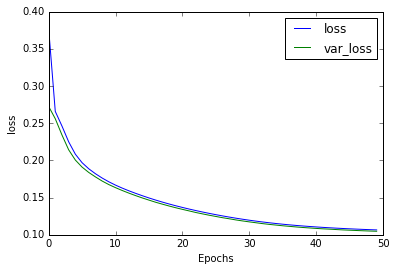

In [33]:
plt.figure(figsize=(6, 4))
plt.plot(range(len(hist.epoch)), hist.history['loss'], label='loss')
plt.plot(range(len(hist.epoch)), hist.history['val_loss'], label='var_loss')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(loc="upper right")
plt.show()

In [ ]:
autoencoder.save_weights('autoencoder.h5')

In [ ]:
from keras.utils.visualize_util import plot
plot(autoencoder, to_file="architecture.png", show_shapes=True)

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# テスト画像を変換
decoded_imgs = autoencoder.predict(x_test)

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Denoising AutoEncoder

In [35]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 1, 28, 28))
x_test = np.reshape(x_test, (len(x_test), 1, 28, 28))

noise_factor = 0.5
# 平均0、標準偏差1の正規分布
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0., scale=1., size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0., scale=1., size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

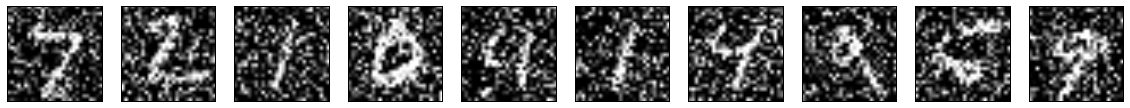

In [36]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [39]:
from keras.layers import Input, Convolution2D, MaxPooling2D, UpSampling2D
from keras.models import Model

input_img = Input(shape=(1, 28, 28))
x = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(input_img)
x = MaxPooling2D((2, 2), border_mode='same')(x)
x = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(x)
encoded = MaxPooling2D((2, 2), border_mode='same')(x)

x = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Convolution2D(1, 3, 3, activation='sigmoid', border_mode='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [40]:
hist = autoencoder.fit(x_train_noisy, x_train,
                nb_epoch=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 321s - loss: 0.1672 - val_loss: 0.1168
Epoch 2/5
60000/60000 [==============================] - 336s - loss: 0.1127 - val_loss: 0.1082
Epoch 3/5
60000/60000 [==============================] - 357s - loss: 0.1071 - val_loss: 0.1047
Epoch 4/5
60000/60000 [==============================] - 354s - loss: 0.1046 - val_loss: 0.1026
Epoch 5/5
60000/60000 [==============================] - 369s - loss: 0.1030 - val_loss: 0.1016


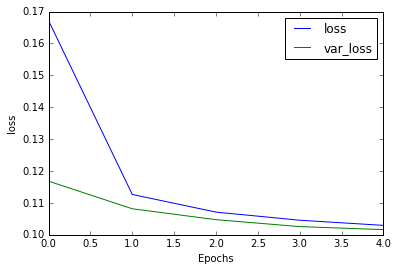

In [41]:
plt.figure(figsize=(6, 4))
plt.plot(range(len(hist.epoch)), hist.history['loss'], label='loss')
plt.plot(range(len(hist.epoch)), hist.history['val_loss'], label='var_loss')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(loc="upper right")
plt.show()

In [14]:
from keras.utils.visualize_util import plot
plot(autoencoder, to_file="architecture.png", show_shapes=True)

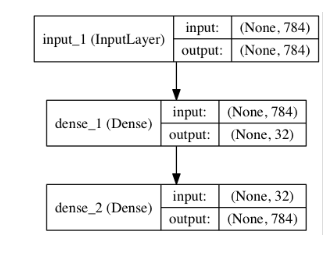

In [32]:
from PIL import Image
im = Image.open("architecture.png", "r")
plt.imshow(np.array(im))
plt.axis('off')
plt.show()

In [25]:
autoencoder